In [1]:
import torch
import torch.nn as nn        # Pytorch neural network package
import torch.optim as optim  # Pytorch optimization package
import torch.nn.functional as F
import numpy
import numpy as np
import matplotlib.pyplot as plt

device = torch.device("cuda")

In [2]:
features = 16
# define a simple linear VAE #until now normal VAE without Beta
class LinearVAE(nn.Module):
    def __init__(self):
        super(LinearVAE, self).__init__()
 
        # encoder 84*84 = 7’056
        self.enc0 = nn.Linear(in_features=84*84, out_features=1024)
        self.enc1 = nn.Linear(in_features=1024, out_features=512)
        self.enc2 = nn.Linear(in_features=512, out_features=features*2)
 
        # decoder 
        self.dec0 = nn.Linear(in_features=features, out_features=512)
        self.dec1 = nn.Linear(in_features=512, out_features=1024)
        self.dec2 = nn.Linear(in_features=1024, out_features=84*84)

    def reparameterize(self, mu, log_var):
        """
        :param mu: mean from the encoder's latent space
        :param log_var: log variance from the encoder's latent space
        """
        std = torch.exp(0.5*log_var) # standard deviation
        eps = torch.randn_like(std) # `randn_like` as we need the same size
        sample = mu + (eps * std) # sampling as if coming from the input space
        return sample
 
    
    def encode(self, x):
        x = F.relu(self.enc0(x))
        x = F.relu(self.enc1(x))
        x = self.enc2(x)
        return x

In [3]:
BVAE1 = LinearVAE()
BVAE10 = LinearVAE()
BVAE50= LinearVAE()
BVAE500 = LinearVAE()


BVAE1.load_state_dict(torch.load('C:/Users/erics/Documents/Programme/Bachelorarbeit/models/BVAE_Pong/B=1VAEMAR9'))
BVAE1.to(device)
BVAE10.load_state_dict(torch.load('C:/Users/erics/Documents/Programme/Bachelorarbeit/models/BVAE_Pong/B=10VAEMAR9'))
BVAE10.to(device)
BVAE50.load_state_dict(torch.load('C:/Users/erics/Documents/Programme/Bachelorarbeit/models/BVAE_Pong/B=50VAEMAR9'))
BVAE50.to(device)
BVAE500.load_state_dict(torch.load('C:/Users/erics/Documents/Programme/Bachelorarbeit/models/BVAE_Pong/B=500VAEMAR9'))
BVAE500.to(device)


LinearVAE(
  (enc0): Linear(in_features=7056, out_features=1024, bias=True)
  (enc1): Linear(in_features=1024, out_features=512, bias=True)
  (enc2): Linear(in_features=512, out_features=32, bias=True)
  (dec0): Linear(in_features=16, out_features=512, bias=True)
  (dec1): Linear(in_features=512, out_features=1024, bias=True)
  (dec2): Linear(in_features=1024, out_features=7056, bias=True)
)

In [4]:
#train_data = numpy.load('train_data100kFEB23.npy')
#val_data = numpy.load('val_data20kFEB23.npy')

In [5]:
#print(train_data.shape)

In [6]:
randomInput = torch.rand(256, 7056, device=device) #7056 = 84* 84
print(randomInput)


tensor([[0.3245, 0.4374, 0.6102,  ..., 0.1270, 0.3620, 0.2613],
        [0.1467, 0.5034, 0.4280,  ..., 0.3021, 0.7419, 0.9832],
        [0.6318, 0.7746, 0.0614,  ..., 0.8294, 0.6049, 0.3827],
        ...,
        [0.5670, 0.3820, 0.8679,  ..., 0.8083, 0.0815, 0.3555],
        [0.3884, 0.1717, 0.9512,  ..., 0.5527, 0.6440, 0.7393],
        [0.3590, 0.9612, 0.2681,  ..., 0.4830, 0.4323, 0.5784]],
       device='cuda:0')


In [7]:
enco1 = BVAE1.encode(randomInput)
enco10 = BVAE10.encode(randomInput)
enco50 = BVAE50.encode(randomInput)
enco500 = BVAE500.encode(randomInput)


print(enco10)
print(enco50)

tensor([[-0.6782,  1.4256,  0.0329,  ..., -2.7011, -7.8261, -1.4987],
        [ 0.1476,  1.5156,  0.0843,  ..., -2.7496, -8.2093, -1.5085],
        [ 0.1648,  1.2148,  0.2434,  ..., -2.8040, -7.7994, -1.5594],
        ...,
        [-0.3952,  1.6221,  0.1438,  ..., -2.7797, -8.1966, -1.5586],
        [ 0.6169,  1.8113,  0.0227,  ..., -2.7345, -8.0013, -1.5006],
        [ 0.5313,  1.2421,  0.0604,  ..., -2.8146, -7.5482, -1.5461]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
tensor([[-7.8513e-01,  2.9469e-02, -2.1079e-02,  ..., -5.1795e-02,
         -5.6051e+00, -6.9357e-02],
        [ 2.5609e-01,  4.6942e-02, -3.5909e-02,  ..., -8.1595e-02,
         -5.6522e+00, -7.2923e-02],
        [ 1.6374e-01,  5.3237e-02,  7.6953e-04,  ..., -1.2779e-01,
         -5.4679e+00, -7.2577e-02],
        ...,
        [-2.9590e-01, -3.7840e-02, -4.6012e-02,  ..., -1.3786e-01,
         -5.8767e+00, -1.0054e-01],
        [ 4.2572e-01,  1.4618e-01, -1.2388e-02,  ...,  4.1099e-02,
         -5.6342e+00,  7

In [8]:
print(enco10.shape)

torch.Size([256, 32])


In [9]:
enco1 = enco1.detach().cpu()
enco10 = enco10.detach().cpu()
enco50 = enco50.detach().cpu()
enco500 = enco500.detach().cpu()

In [10]:
def compute_gaussian_kl(z_mean, z_logvar):
    return np.mean(0.5 * (np.square(z_mean) + np.exp(z_logvar) - z_logvar - 1), axis=0)

def computeIt(enco):
    x = enco.view(-1, 2, features)
    # get `mu` and `log_var`
    mu = x[:, 0, :] # the first feature values as mean
    log_var = x[:, 1, :]

    return compute_gaussian_kl(mu.detach().cpu().numpy(), log_var.detach().cpu().numpy())

In [11]:
KLenco1 = computeIt(enco1)
KLenco10 = computeIt(enco10)
KLenco50 = computeIt(enco50)
KLenco500 = computeIt(enco500)

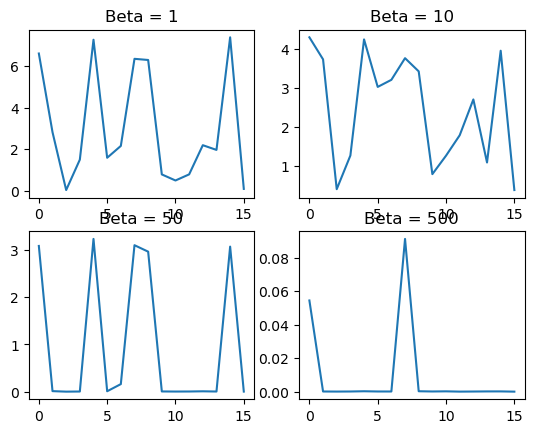

In [12]:
figure, axis = plt.subplots(2,2)

axis[0,0].plot(KLenco1)
axis[0,0].set_title( 'Beta = 1')
axis[0,1].plot(KLenco10)
axis[0,1].set_title( 'Beta = 10')
axis[1,0].plot(KLenco50)
axis[1,0].set_title( 'Beta = 50')
axis[1,1].plot(KLenco500)
axis[1,1].set_title( 'Beta = 500')

plt.show()

In [13]:
#enco1 = numpy.mean(enco1, axis=0)
#enco10 = numpy.mean(enco10, axis=0)
#enco50 = numpy.mean(enco50, axis=0)
#enco500 = numpy.mean(enco500, axis=0)

In [14]:
#figure, axis = plt.subplots(2,2)

#axis[0,0].plot(enco1)
#axis[0,0].set_title( 'Beta = 1')
#axis[0,1].plot(enco10)
#axis[0,1].set_title( 'Beta = 10')
#axis[1,0].plot(enco50)
#axis[1,0].set_title( 'Beta = 50')
#axis[1,1].plot(enco500)
#axis[1,1].set_title( 'Beta = 500')


#plt.show()

In [15]:
print(KLenco1.shape)

(16,)


In [16]:
numZero1 = (numpy.histogram(KLenco1, bins=(0, 0.01))[0]) 
numZero10 = (numpy.histogram(KLenco10, bins=(0, 0.01))[0]) 
numZero50 = (numpy.histogram(KLenco50, bins=(0, 0.01))[0])
numZero500 = (numpy.histogram(KLenco500, bins=(0, 0.01))[0])

print("Beta = 1  " + str(numZero1))
print("Beta = 10  " + str(numZero10))
print("Beta = 50  " + str(numZero50))
print("Beta = 500  " + str(numZero500))

Beta = 1  [0]
Beta = 10  [0]
Beta = 50  [9]
Beta = 500  [14]


In [17]:
Nonzero1 = 16-numZero1
Nonzero10 = 16-numZero10
Nonzero50 = 16-numZero50
Nonzero500 = 16-numZero500

print("Nonzero Dimensions Beta = 1  " + str(Nonzero1))
print("Nonzero Dimensions Beta = 10  " + str(Nonzero10))
print("Nonzero Dimensions Beta = 50  " + str(Nonzero50))
print("Nonzero Dimensions Beta = 500  " + str(Nonzero500))

Nonzero Dimensions Beta = 1  [16]
Nonzero Dimensions Beta = 10  [16]
Nonzero Dimensions Beta = 50  [7]
Nonzero Dimensions Beta = 500  [2]
